#**LIBRERIAS**


In [ ]:
pip install pandas==2.2.2 numpy==2.0.2 scikit-learn==1.8.0 seaborn==0.13.2 joblib==1.5.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 70.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import joblib

#**VERSIONES**

In [ ]:
print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numpy: {np.__version__}')
print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de seaborn: {sns.__version__}')
print(f'Versión de joblib: {joblib.__version__}')

Versión de pandas: 2.2.2
Versión de numpy: 2.0.2
Versión de scikit-learn (sklearn): 1.8.0
Versión de seaborn: 0.13.2
Versión de joblib: 1.5.3


In [ ]:
df=pd.read_csv('/content/netflix_customer_churn.csv')
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [ ]:
#Verificar que todo sean valores unicos
df.customer_id.nunique()

5000

In [ ]:
#Eliminar el customer_id ya que no sera util para el analisis
df=df.drop(['customer_id'],axis=1)

In [ ]:
df.head()

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


#**ANALISIS EXPLORATORIO**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     5000 non-null   int64  
 1   gender                  5000 non-null   object 
 2   subscription_type       5000 non-null   object 
 3   watch_hours             5000 non-null   float64
 4   last_login_days         5000 non-null   int64  
 5   region                  5000 non-null   object 
 6   device                  5000 non-null   object 
 7   monthly_fee             5000 non-null   float64
 8   churned                 5000 non-null   int64  
 9   payment_method          5000 non-null   object 
 10  number_of_profiles      5000 non-null   int64  
 11  avg_watch_time_per_day  5000 non-null   float64
 12  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 507.9+ KB


In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df["churned"].value_counts(normalize=True)

,proportion
churned,
1,0.503
0,0.497


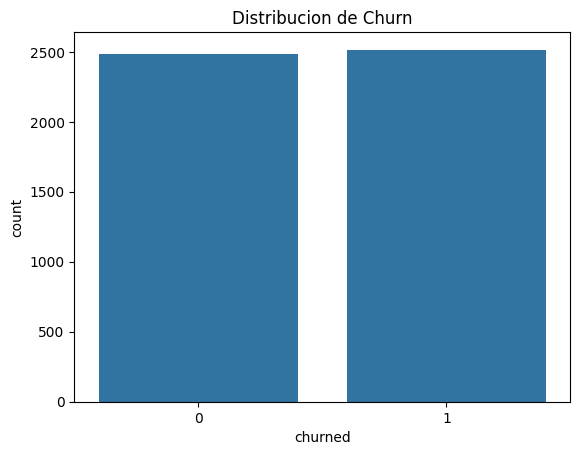

In [ ]:
sns.countplot(x="churned", data=df)
plt.title("Distribucion de Churn")
plt.show()

- El dataset está moderadamente balanceado

- No requiere técnicas de balanceo

- Métricas como Accuracy y F1 son válidas

#**ANÁLISIS DE VARIABLES NUMÉRICAS**

##**Distribución de varibles clave**


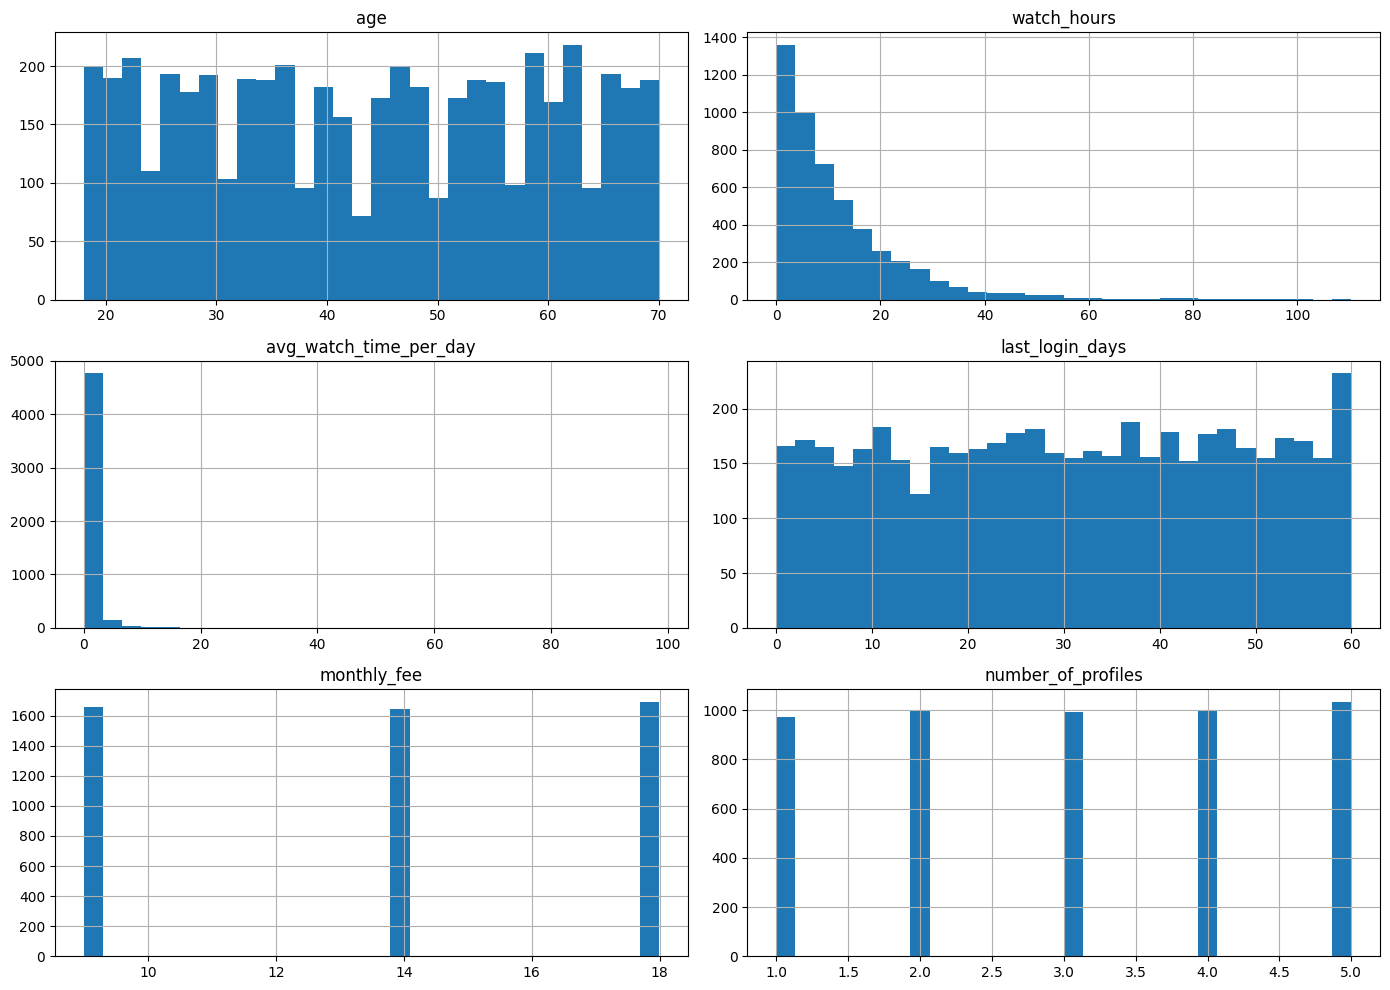

In [ ]:
num_cols = [
    "age",
    "watch_hours",
    "avg_watch_time_per_day",
    "last_login_days",
    "monthly_fee",
    "number_of_profiles"
]

df[num_cols].hist(bins=30, figsize=(14,10))
plt.tight_layout()
plt.show()


**age (Edad)**

- Distribución relativamente uniforme o levemente concentrada en adultos.

- No hay extremos muy marcados.

- La edad por sí sola no es un predictor fuerte de churn.

**watch_hours (total de horas vistas)**

- Distribución sesgada a la derecha.

- Muchos usuarios con pocas horas.

- Pocos usuarios con muchas horas.

- Usuarios con pocas horas totales suelen tener mayor churn.

**avg_watch_time_per_day (Uso promedio por dia)**

- Concentración en valores bajos.

- Cola larga hacia valores altos.

- La mayoría consume poco contenido diario.

- Usuarios con consumo diario bajo son más propensos a churn.

**last_login_days (dias desde el ultimo login)**

- Distribución muy asimétrica.

- Muchos usuarios con pocos días desde el último login.

- Algunos con muchos días sin entrar.

- Variable crítica para churn.

- A más días sin login, mayor riesgo de cancelación.

**monthly_fee (cuotal mensual)**

- Distribución por niveles (planes).

- Picos que corresponden a tipos de suscripción.

- El precio está ligado al plan.

- Clientes con fee alto y bajo uso son candidatos a churn.

**number_of_profiles (numero de perfiles)**

- Valores (1, 2, 3, 4 perfiles).

- Mayor concentración en 1 o 2 perfiles.

- Cuentas con más perfiles suelen tener menor churn.

- Más perfiles implica más usuarios dependientes del servicio.

**CONCLUSION**
Los histogramas muestran que el churn está más relacionado con el uso reciente y el nivel de engagement que con características demográficas.

##**Relación entre Variables Numéricas y Churn**


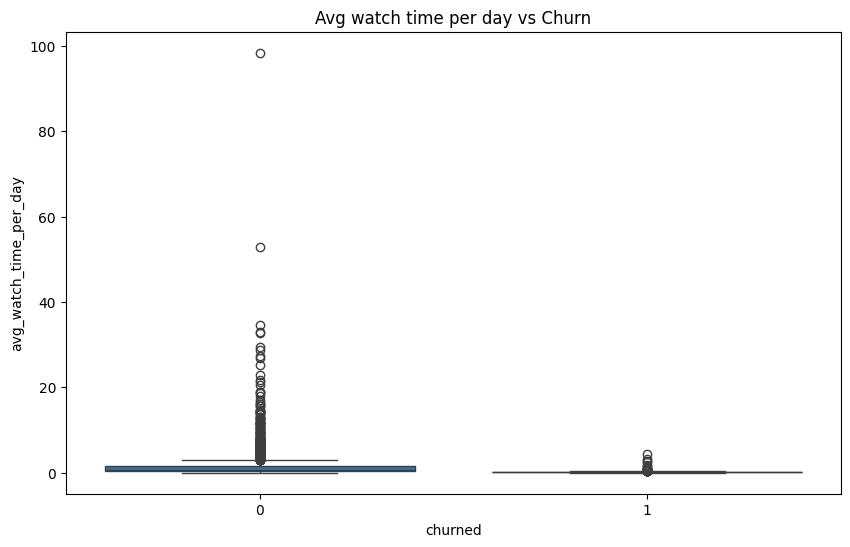

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="churned", y="avg_watch_time_per_day", data=df)
plt.title("Avg watch time per day vs Churn")
plt.show()

**Clientes que NO churnearon (churned = 0)**

- Mediana de avg_watch_time_per_day más alta

- Caja más arriba

Indica:

- uso diario constante

- hábito de consumo

**Clientes que SÍ churnearon (churned = 1)**

- Mediana claramente más baja

- Caja desplazada hacia abajo

Indica:

- bajo engagement

- pérdida de hábito antes de cancelar

**Conclusión**

Se visualiza en el boxplot el patrón de comportamiento de uso diario significativamente menor de los clientes que cancelan, lo que valida el engagement como el principal predictor de churn.

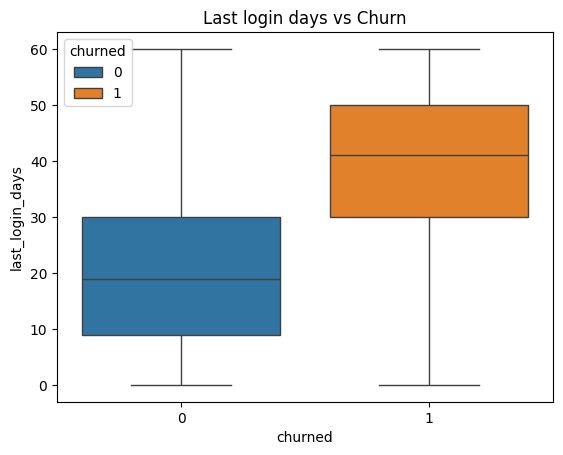

In [ ]:
sns.boxplot(x="churned", y="last_login_days", data=df, hue = 'churned')
plt.title("Last login days vs Churn")
plt.show()

**Clientes que NO churnearon (churned = 0)**

- Mediana baja de last_login_days

- Caja concentrada en valores pequeños

Indica:

- uso reciente

- hábito activo

**Clientes que SÍ churnearon (churned = 1)**

- Mediana mucho más alta

- Caja desplazada hacia arriba

Indica:

- largos periodos sin entrar

- desinterés previo a la cancelación


Mientras más días pasan sin que el cliente inicie sesión, mayor es la probabilidad de que cancele.

Entonces, el churn no ocurre de inmediato, primero hay inactividad yluego la cancelación.

**Conclusion**

El boxplot muestra que los clientes que cancelan pasan significativamente más días sin iniciar sesión, lo que convierte la inactividad en uno de los principales predictores de churn.

#**VARIABLES CATEGORICAS VS CHURN**



##**Tipo de suscripción**




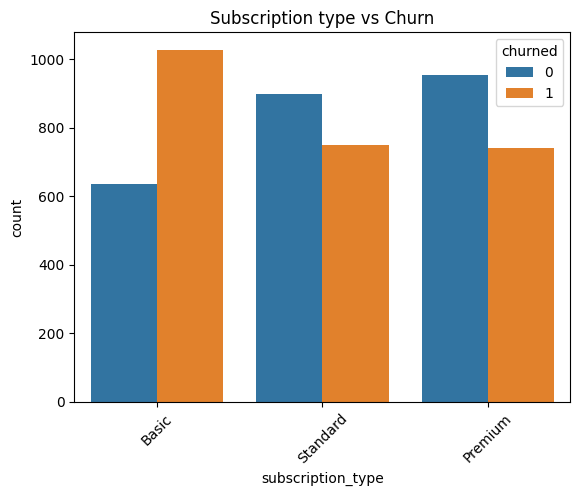

In [ ]:
sns.countplot(x="subscription_type", hue="churned", data=df)
plt.xticks(rotation=45)
plt.title("Subscription type vs Churn")
plt.show()

**Planes básicos**

- Mayor proporción de churn

- Menor compromiso económico

- Clientes más sensibles al precio

**Planes intermedios**

- Churn moderado

- Mejor balance entre costo y valor

**Planes premium**

- Menor churn relativo

- Clientes con mayor engagement

- Más inversión en el servicio

Los clientes con planes más básicos tienden a cancelar más que los clientes con planes premium.

Esto es muy importante porque el tipo de plan sí influye en la retención y no todos los clientes tienen el mismo riesgo

**Conclusión**

Observamos que los planes básicos concentran mayor churn, mientras que los planes premium presentan mayor retención, lo que demuestra que el tipo de suscripción es un factor clave en la cancelación.


##**Método de pago**


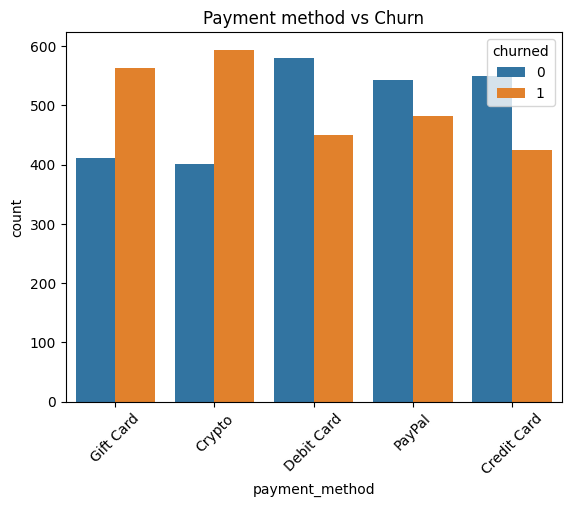

In [ ]:
sns.countplot(x="payment_method", hue="churned", data=df)
plt.xticks(rotation=45)
plt.title("Payment method vs Churn")
plt.show()

**Métodos de pago automáticos (tarjeta de credito, debito, etc)**

- Menor proporción de churn

- Menos cancelaciones involuntarias

**Métodos manuales (transferencias o pagos manuales en dias especificos)**

- Mayor proporción de churn

- Más fallos de pago

- Mayor abandono

El método de pago influye en la retención del cliente.
Los pagos automáticos reducen el churn, mientras que los métodos manuales lo incrementan.

**Conclusión**

Se observa que los clientes con métodos de pago automáticos presentan menor churn, mientras que los métodos manuales muestran mayor tasa de cancelación.

##**Dispositivo**

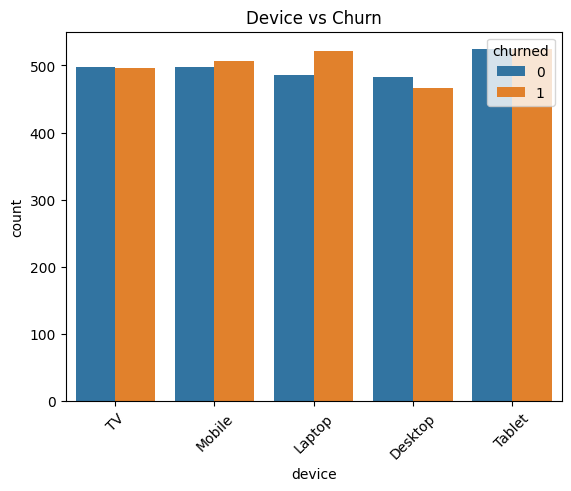

In [ ]:
sns.countplot(x="device", hue="churned", data=df)
plt.xticks(rotation=45)
plt.title("Device vs Churn")
plt.show()

**Dispositivos de uso cómodo (TV, desktop)**

- Menor proporción de churn

- Uso más frecuente y compartido

- Mayor hábito de consumo

**Dispositivos personales (Mobile, Laptop)**

- Churn ligeramente más alto

- Uso más casual o esporádico

- Menor compromiso



**Conclusión**

El tipo de dispositivo muestra diferencias moderadas en churn, por lo que la experiencia de uso influye, aunque el abandono está principalmente explicado por el nivel de actividad y engagement.

#**CORRELACIÓN ENTRE VARIBLES NUMÉRICAS**

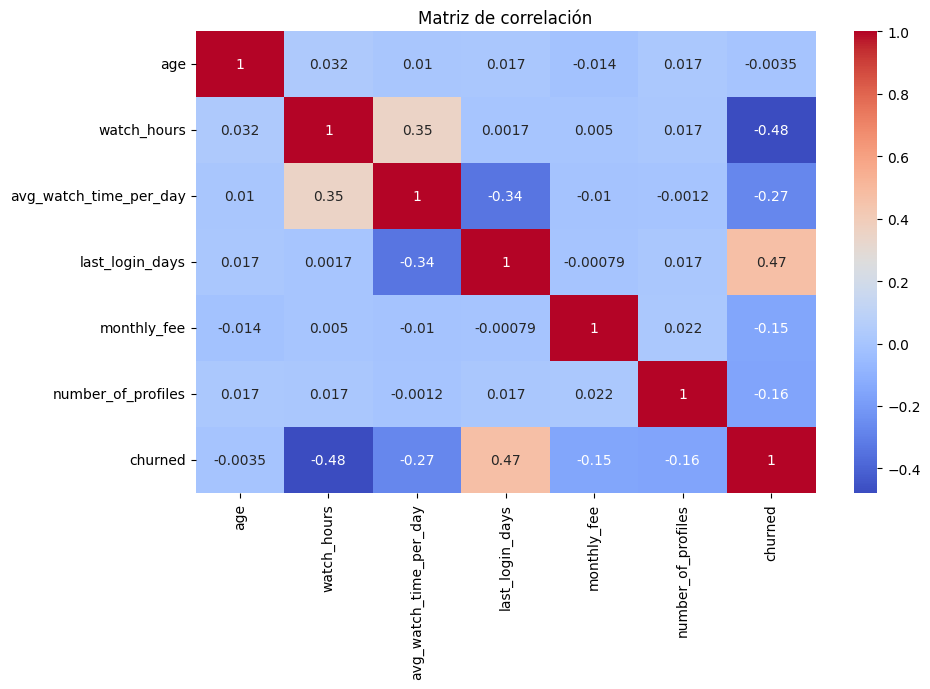

In [ ]:
corr = df[num_cols + ["churned"]].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

**Conclusión**

La matriz de correlación confirma que el churn está principalmente asociado a patrones de uso e inactividad.

#**MODELADO Y SEPARACION DE DATOS**

##**Definir variables (features) y target**

In [ ]:
features = [
    "age",
    "subscription_type",
    "watch_hours",
    "avg_watch_time_per_day",
    "last_login_days",
    "monthly_fee",
    "number_of_profiles",
    "payment_method",
    "device",
    "region",
    "favorite_genre"
]

X = df[features]
y = df["churned"]

##**Separación Train / Test**


In [ ]:
#80% de entrenamiento 20% prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42,stratify=y)

Usamos un split 80/20 con estratificación para mantener la proporción de churn y asegurar una evaluación justa y reproducible del modelo.

#**Preprocesamiento (numéricas y categóricas)**


##**Identificar tipos de variables**

In [ ]:
numeric_variable = [
    "age",
    "watch_hours",
    "avg_watch_time_per_day",
    "last_login_days",
    "monthly_fee",
    "number_of_profiles"
]

categorical_variable = [
    "subscription_type",
    "payment_method",
    "device",
    "region",
    "favorite_genre"
]

##**Construir transformador**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
     transformers=[
        ('num', StandardScaler(), numeric_variable),
        ('cat', OneHotEncoder(handle_unknown='ignore',sparse_output=False), categorical_variable)
    ],
    remainder='drop'
)

Usamos un ColumnTransformer para aplicar escalado a variables numéricas y One Hot Encoding a variables categóricas, asegurando consistencia entre entrenamiento y producción.

No usamos get_dummies porque no es seguro ante categorías nuevas.

#**MODELO BASE: Logistic Regression**

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

modelo = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

Usamos un pipeline que integra preprocesamiento y regresión logística para asegurar consistencia y evitar fugas de información.

In [ ]:
##############################################################################################################
from sklearn.model_selection import GridSearchCV, StratifiedKFold
# Definimos el metodo de validacion cruzada
cruzado = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)
# Ajuste de hiperparametros con GridSearchCV
parametros = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__solver': ['liblinear'],
    'classifier__class_weight': [None, 'balanced']
}
# Creacion de los modelos con GridSearchCV
# Dado que se busca detectar la mayor cantidad de churned = 1, se utiliza RECALL como métrica principal.
# aceptando errar un poco con falsos positivos
modelo_GSV = GridSearchCV(
    estimator = modelo,
    param_grid = parametros,
    cv = cruzado,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

#**ENTRENAMIENTO DE MODELO**

In [ ]:
##########################################################################################################
#Modelo base trabaja con el GridSearchCV
# modelo_GSV.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step..._iter=1000))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'classifier__C': [0.01, 0.1, ...], 'classifier__class_weight': [None, 'balanced'], 'classifier__penalty': ['l1', 'l2'], 'classifier__solver': ['liblinear']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'recall'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedKFo... shuffle=True)
,"verbose verbose: intControls the verbosity: the higher, the mo

In [ ]:
modelo.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

Con modelo.fit entrenamos el pipeline completo, aprendiendo los patrones de churn a partir de los datos de entrenamiento.

#**EVALUACIÓN DEL MODELO**

In [ ]:
###############################################################################
# print("Mejores parametros:", modelo_GSV.best_params_)
# print("Mejor CV score:", modelo_GSV.best_score_)
# modelo_entrenado = modelo_GSV.best_estimator_

Mejores parametros: {'classifier__C': 0.01, 'classifier__class_weight': None, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Mejor CV score: 0.911520560966878


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       497
           1       0.88      0.91      0.89       503

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000

ROC AUC: 0.9653867539231412


In [ ]:
###############################################################################
# y_pred_GSV = modelo_entrenado.predict(X_test)
# y_prob_GSV = modelo_entrenado.predict_proba(X_test)[:, 1]

# print(classification_report(y_test, y_pred_GSV))
# print("ROC AUC:", roc_auc_score(y_test, y_prob_GSV))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       497
           1       0.84      0.91      0.88       503

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000

ROC AUC: 0.9483021388769997


##**INTERPRETACIÓN**
**CHURN --> 1**
- Precision (0.88)- De los clientes marcados como churn, 88% realmente cancelaron.
- Recall (0.91) - Detecta el 91% de los churn reales.
- F1 Score (0.89) - Excelente balance.

**NO CHURN --> 0**
- Precision (0.90)- Cuando el modelo dice NO churn, el modelo acierta el 90%
- Recall (0.87) - Detecta el 87% de los clientes que realmente no churnearon.
- F1 Score (0.89) - Buen balance.

**Soporte (support)**

- NO Churn (0): 497

- Churn (1): 503

**Accuracy, macro avg y weighted avg**

Todos están en 0.89, no hay una clase que este dominando.

Dataset perfectamente balanceado.
Eso hace que el accuracy sea confiable, las métricas sean estables y el modelo no esté sesgado


**CONCLUSIÓN**

El modelo es confiable para detectar clientes en riesgo de churn y aplicar acciones preventivas, con bajo riesgo de falsas alarmas y mínima pérdida de churn real.

El modelo logra identificar más del 90% de los clientes que cancelan, con una capacidad de discriminación superior al 96%, lo que lo hace altamente efectivo para estrategias de retención.

### Importacia de variables


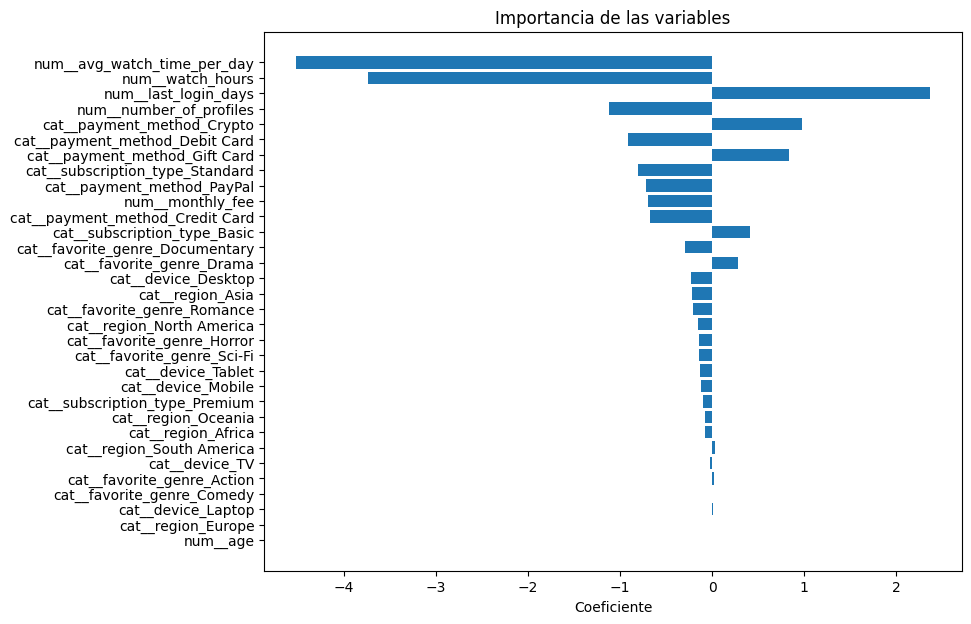

In [ ]:
feature_names = modelo.named_steps['preprocessor'].get_feature_names_out()
coefs = modelo.named_steps['classifier'].coef_[0]

importance_df = (
    pd.DataFrame({
        'feature': feature_names,
        'coefficient': coefs,
        'abs_coefficient': np.abs(coefs)
    })
    .sort_values('abs_coefficient')
)

plt.figure(figsize=(9, 7))
plt.barh(importance_df['feature'], importance_df['coefficient'])
plt.xlabel('Coeficiente')
plt.title('Importancia de las variables')
plt.show()

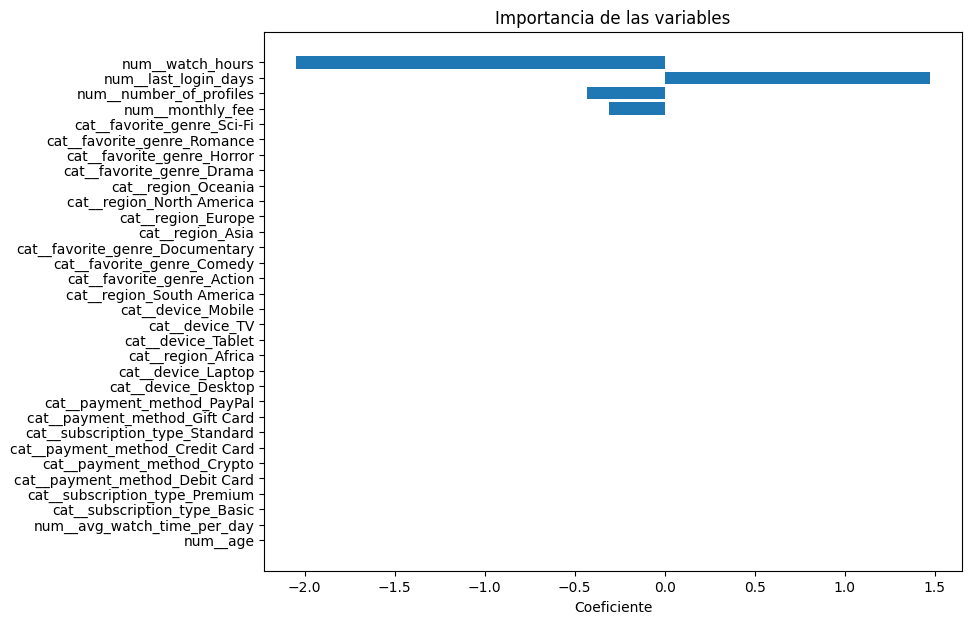

In [ ]:
###############################################################################
# feature_names = modelo_entrenado.named_steps['preprocessor'].get_feature_names_out()
# coefs = modelo_entrenado.named_steps['classifier'].coef_[0]

# importance_df = (
#     pd.DataFrame({
#         'feature': feature_names,
#         'coefficient': coefs,
#         'abs_coefficient': np.abs(coefs)
#     })
#     .sort_values('abs_coefficient')
# )

# plt.figure(figsize=(9, 7))
# plt.barh(importance_df['feature'], importance_df['coefficient'])
# plt.xlabel('Coeficiente')
# plt.title('Importancia de las variables')
# plt.show()

#**MATRIZ DE CONFUSIÓN**

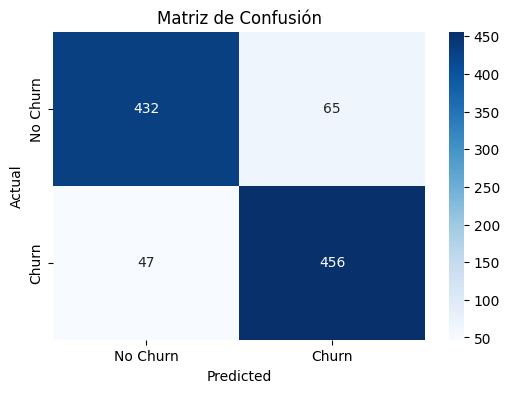

In [ ]:
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Churn", "Churn"],
    yticklabels=["No Churn", "Churn"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión")
plt.show()

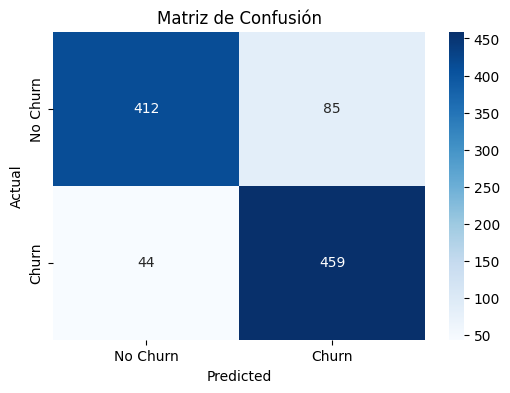

In [ ]:
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_GSV)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Churn", "Churn"],
    yticklabels=["No Churn", "Churn"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión")
plt.show()

##**INTERPRETACIÓN**
**Verdaderos negativos = 432***

- Clientes que NO churnearon, el modelo predijo correctamente en NO churn.

**Falsos Positivos = 65**

- Clientes que NO iban a churnear y el modelo marco como Churn (falsa alarma).

**Falsos Negativos = 47**

- Clientes que SÍ churnearon y el modelo no los detecto.

**Verdaderos Positivos = 465**

- Clientes que SÍ churnearon y el modelo los detectó correctamente

##**CONCLUSIÓN**

La matriz de confusión muestra que el modelo identifica correctamente más del 90% de los clientes que cancelan, con un número controlado de falsas alarmas, lo que lo hace ideal para estrategias de retención.

##**MÉTRICAS DE DESEMPEÑO**

In [ ]:
#Evaluando el modelo: exactitud, precision, recall y F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred)
print("F1-Score:",f1)

Accuracy: 0.888
Precision: 0.8752399232245681
Recall: 0.9065606361829026
F1-Score: 0.890625


In [ ]:
###############################################################################
#Evaluando el modelo: exactitud, precision, recall y F1-score
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# accuracy = accuracy_score(y_test, y_pred_GSV)
# print("Accuracy:", accuracy)
# precision = precision_score(y_test, y_pred_GSV)
# print("Precision:", precision)
# recall = recall_score(y_test, y_pred_GSV)
# print("Recall:", recall)
# f1 = f1_score(y_test, y_pred_GSV)
# print("F1-Score:",f1)

Accuracy: 0.871
Precision: 0.84375
Recall: 0.9125248508946322
F1-Score: 0.8767908309455588


##**SERIALIZACIÓN DEL MODELO**

In [ ]:
joblib.dump(
    {
        'model': modelo,
        'trained_at': '2026-01-13'
    },
    'modelo_InsightCore.pkl'
)

['modelo_InsightCore.pkl']

In [ ]:
###############################################################################
# joblib.dump(
#     {
#         'model': modelo_entrenado,
#         'trained_at': '2026-01-13'
#     },
#     'modelo_InsightCore_V2.pkl'
# )

['modelo_InsightCore_V2.pkl']